# Customer Booking - EDA
# Bi-Variate ANalysis



In [13]:
import pandas as pd
import numpy as np

In [14]:
# Loading CSV file

df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [15]:
df.shape

(50000, 14)

In [16]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [18]:
# Checking for Null Values in Dataset

df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Analysis

# Ensuring all columns are of the correct data_type

In [20]:
df['flight_hour'] = df['flight_hour'].astype('object')
df['flight_hour'] = df['flight_hour'].astype('object')
df['wants_extra_baggage'] = df['wants_extra_baggage'].astype('object')
df['wants_in_flight_meals'] = df['wants_in_flight_meals'].astype('object')
df['wants_preferred_seat'] = df['wants_preferred_seat'].astype('object')
df['booking_complete'] = df['booking_complete'].astype('object')

In [21]:
df.select_dtypes(include='object').columns

Index(['sales_channel', 'trip_type', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'booking_complete'],
      dtype='object')

In [22]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts()/len(df)*100)

Internet    88.764
Mobile      11.236
Name: sales_channel, dtype: float64
RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: trip_type, dtype: float64
8     6.330
12    6.326
9     6.264
7     6.252
11    6.220
13    6.202
10    6.170
6     6.100
5     5.702
4     5.686
14    5.666
3     5.310
2     5.284
15    4.468
1     4.178
16    3.114
0     3.078
23    1.972
17    1.722
22    1.158
18    0.878
21    0.778
19    0.590
20    0.552
Name: flight_hour, dtype: float64
Mon    16.204
Wed    15.348
Tue    15.346
Thu    14.848
Fri    13.522
Sun    13.108
Sat    11.624
Name: flight_day, dtype: float64
AKLKUL    5.360
PENTPE    1.848
MELSGN    1.684
ICNSIN    1.602
DMKKIX    1.488
          ...  
LBUTPE    0.002
CXRMEL    0.002
DELKBR    0.002
KOSSYD    0.002
MRUXIY    0.002
Name: route, Length: 799, dtype: float64
Australia               35.744
Malaysia                14.348
South Korea              9.118
Japan                    7.770
China                    6.774
      

- Some Columns have unbalanced data which would affect during model training
- Will ensure it's taken care of post EDA

In [23]:
df[df['booking_complete']==1].shape

(7478, 14)

In [24]:
(7478/50000)*100

14.956

- Out of 50,000 entries, only 7478 have completed the booking. 
- Meaning only 14.95% bookings end up completed

# EDA

# Numerical features

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
# Extracting routes for booking_origin columns which are null
bodf = df[df['booking_origin']==('(not set)')]
bodf['route'].value_counts()
bl = []
bl.append(bodf['route'].value_counts().index)

bll=[]
for i in range(0,58):
    bll.append(bl[0][i])
    
# Output as a proper list
print(bll)

['DPSPVG', 'AKLKUL', 'DPSPEK', 'DMKPER', 'IKASIN', 'MELSGN', 'MYYPER', 'HKTPVG', 'PENTPE', 'PERTPE', 'CTUPEN', 'HYDSYD', 'MAAOOL', 'COKOOL', 'PVGSGN', 'CEBMEL', 'CTUMEL', 'COKMEL', 'JOGKIX', 'KBRPEK', 'LGKPVG', 'PVGTGG', 'BKIICN', 'CGKHND', 'CGKICN', 'CGKKIX', 'CKGMRU', 'CTUSYD', 'DPSHGH', 'HGHHKT', 'HGHSIN', 'HGHTRZ', 'HNDPEN', 'MNLSYD', 'ICNPEN', 'ICNPER', 'PEKTRZ', 'IKAMNL', 'KTMTPE', 'MELPEK', 'MELPVG', 'HGHLGK', 'MELTPE', 'MELXIY', 'OOLPEK', 'PEKSYD', 'PERTRZ', 'HKTMEL', 'PVGSUB', 'TRZXIY', 'DPSICN', 'DELOOL', 'SUBTPE', 'DACMEL', 'CKGTRZ', 'PVGSIN', 'CTUDPS', 'PEKPEN']


In [27]:
bodf[bodf['route']=='AKLKUL']

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
252,2,Internet,RoundTrip,14,17,10,Sat,AKLKUL,(not set),1,0,0,8.83,1
1147,3,Internet,RoundTrip,40,17,0,Fri,AKLKUL,(not set),0,0,0,8.83,0
35056,3,Internet,RoundTrip,112,5,0,Tue,AKLKUL,(not set),1,1,1,8.83,0
35095,1,Internet,RoundTrip,111,5,0,Wed,AKLKUL,(not set),1,1,1,8.83,0


In [28]:
df[df['route']=='AKLKUL']['booking_origin'].mode()

0    Malaysia
Name: booking_origin, dtype: object

In [29]:
l=[]

for route in bodf['route'].value_counts().index:
    l.append(df[df['route']==route]['booking_origin'].mode())

In [30]:
l[1][0]

'Malaysia'

In [31]:
len(l)

58

In [32]:
# Converting to 1D list

l1=[]
for i in range (0,58):
    l1.append(l[i][0])

len(l1)

58

In [33]:
# Creating mapping dataframe

edf = pd.DataFrame({'route': bll, 'booking_origin': l1})
edf.head()

,route,booking_origin
0,DPSPVG,China
1,AKLKUL,Malaysia
2,DPSPEK,China
3,DMKPER,Australia
4,IKASIN,Singapore


In [34]:
# converting ('not set') to null
 
df['booking_origin'] = df['booking_origin'].replace('(not set)', np.nan)

In [35]:
len(df[df['booking_origin'].isna()])

84

In [36]:
# Create a dictionary mapping country codes to country names
country_mapping = edf.set_index('route')['booking_origin'].to_dict()

# Fill missing values in 'country' column using the mapping
df['booking_origin'] = df['booking_origin'].fillna(df['route'].map(country_mapping))

# Bi-Variate Analysis

# Numerical vs Numerical

# Num of passengers

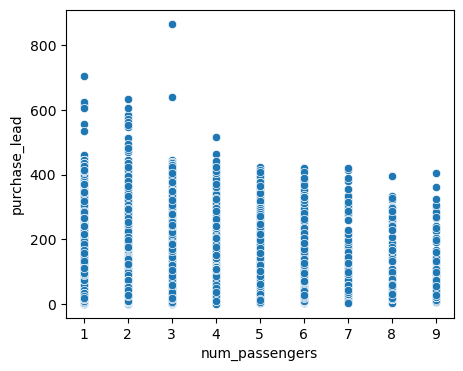

In [37]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['num_passengers'], y=df['purchase_lead'])
plt.show()

* We can see the outliers in tickets having passenger counts as 3, 4 and 1


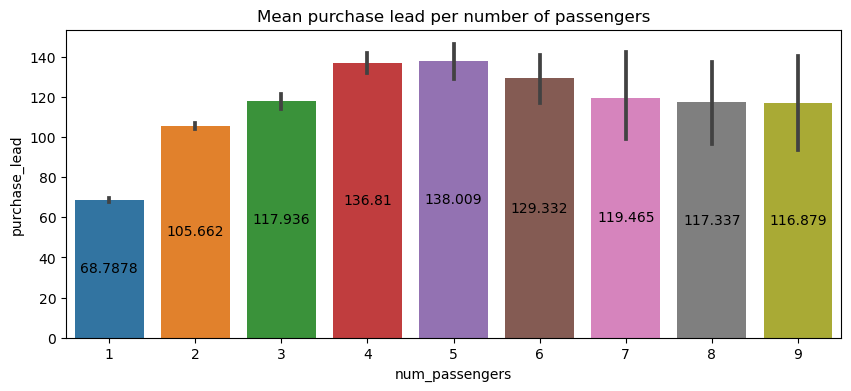

In [38]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean purchase lead per number of passengers')
plt.show()

* Solo travelers (1) have low purchase lead.
* This could likely imply that most Solo travellers could be business professionals

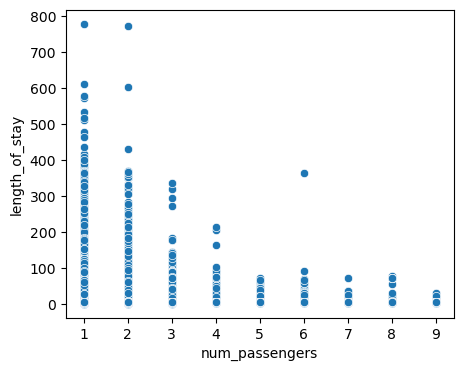

In [39]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['num_passengers'], y=df['length_of_stay'])
plt.show()

* Outliers can be spotted in tickets having passenger counts of 1, 2, 6.
* We can observe that the length of stay tends to decrease as the passenger count increases.

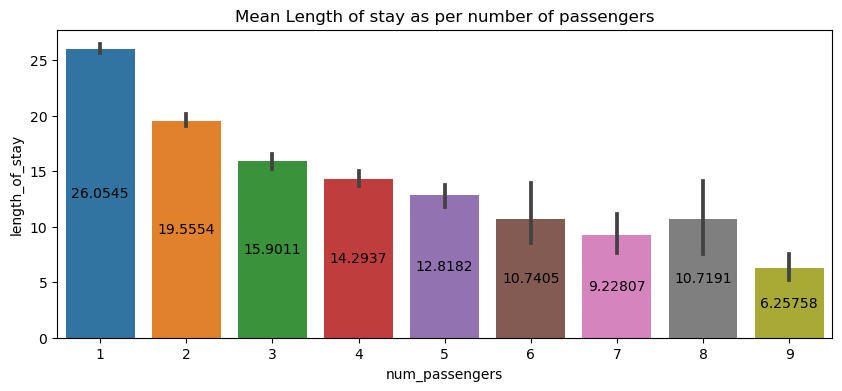

In [40]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Length of stay as per number of passengers')
plt.show()

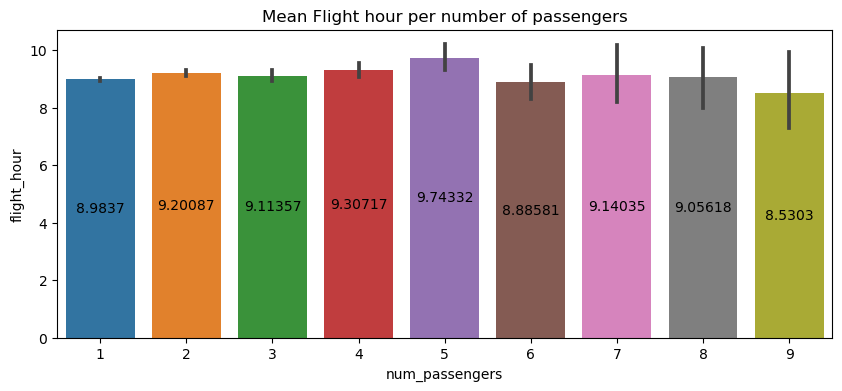

In [41]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['flight_hour'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight hour per number of passengers')
plt.show()

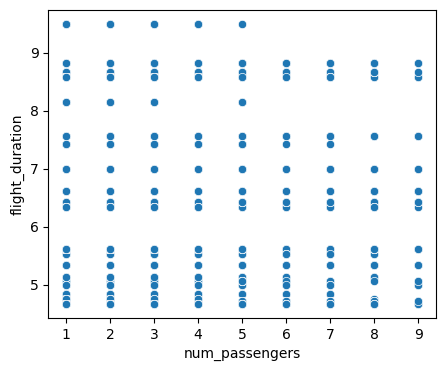

In [42]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['num_passengers'], y=df['flight_duration'])
plt.show()

* This plot shows us that majority of the flights in which the passengers travel is medium haul (3-6 hours).

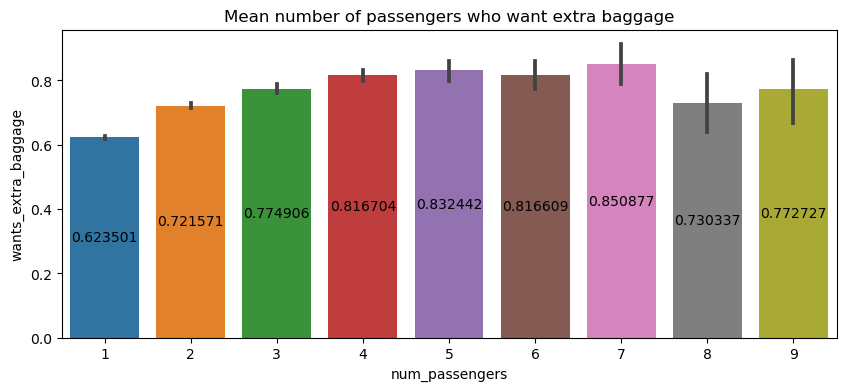

In [43]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['wants_extra_baggage'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean number of passengers who want extra baggage')
plt.show()

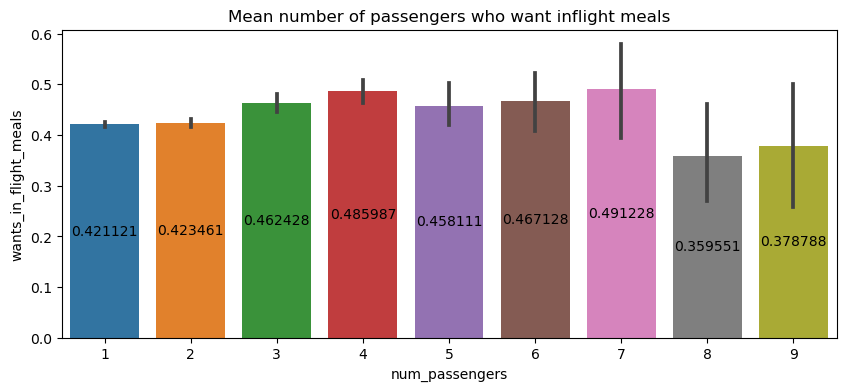

In [44]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean number of passengers who want inflight meals')
plt.show()

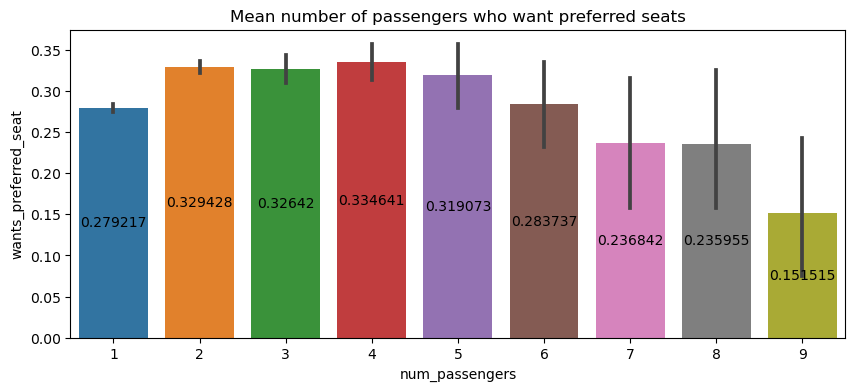

In [45]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['wants_preferred_seat'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean number of passengers who want preferred seats')
plt.show()

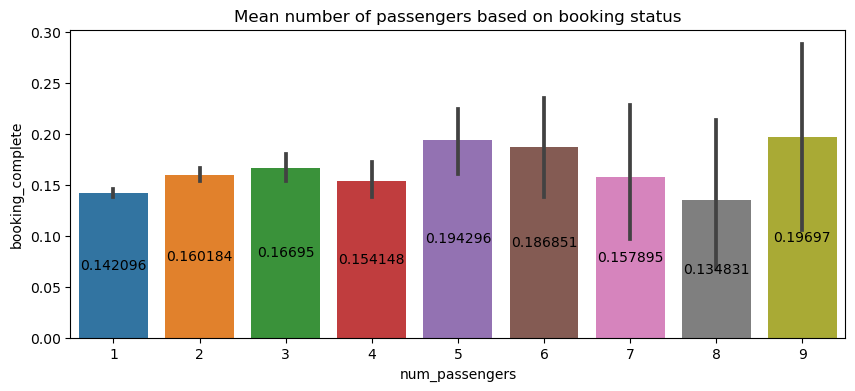

In [46]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x=df['num_passengers'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean number of passengers based on booking status')
plt.show()

# purchase lead and length of stay

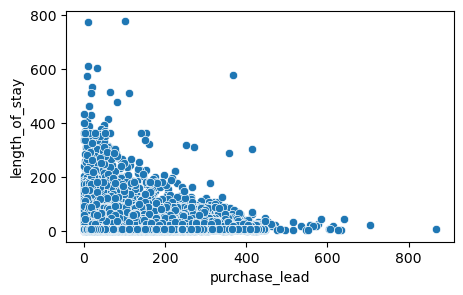

In [47]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df['purchase_lead'], y=df['length_of_stay'])
plt.show()

# Categorical Vs Numerical

# Sales channel

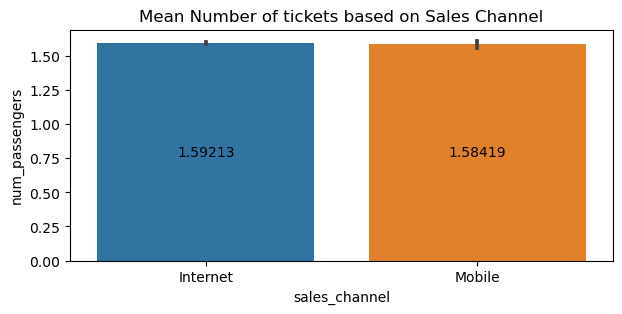

In [48]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['num_passengers'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Number of tickets based on Sales Channel')
plt.show()

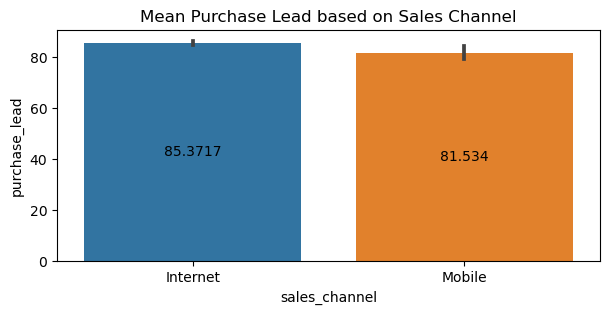

In [49]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Purchase Lead based on Sales Channel')
plt.show()

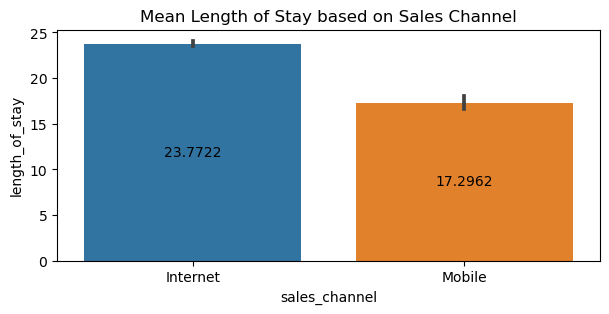

In [50]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Length of Stay based on Sales Channel')
plt.show()

# Trip Type

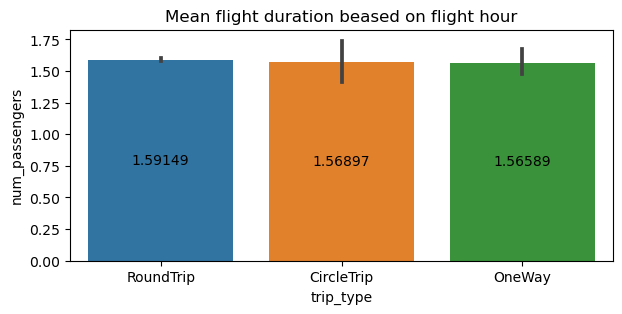

In [51]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['num_passengers'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

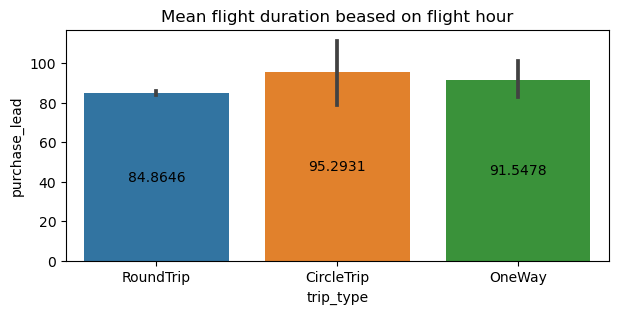

In [52]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

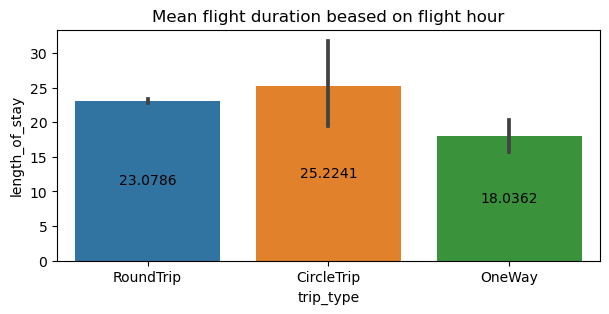

In [53]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

# Flight Hour

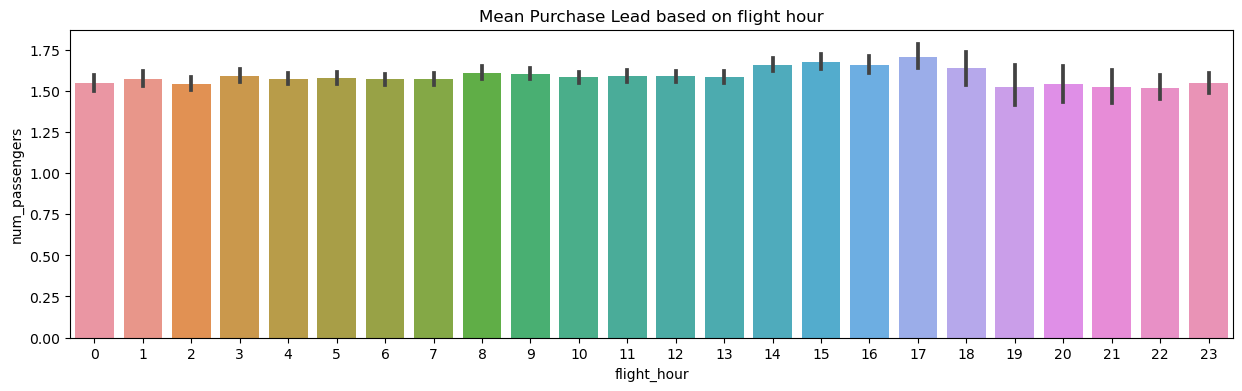

In [54]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['num_passengers'])
plt.title('Mean Purchase Lead based on flight hour')
plt.show()

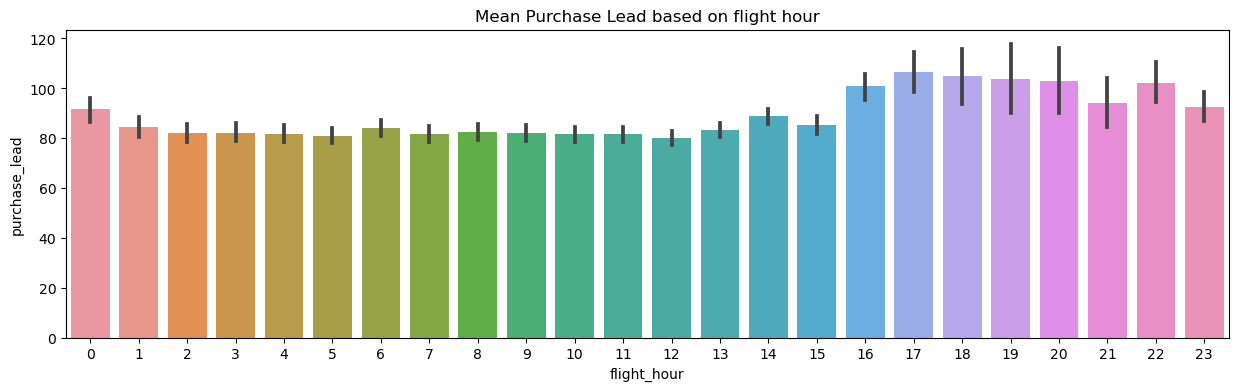

In [55]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['purchase_lead'])
plt.title('Mean Purchase Lead based on flight hour')
plt.show()

* This plots shows us that Purchase Lead is higher in general for late evening and night flights

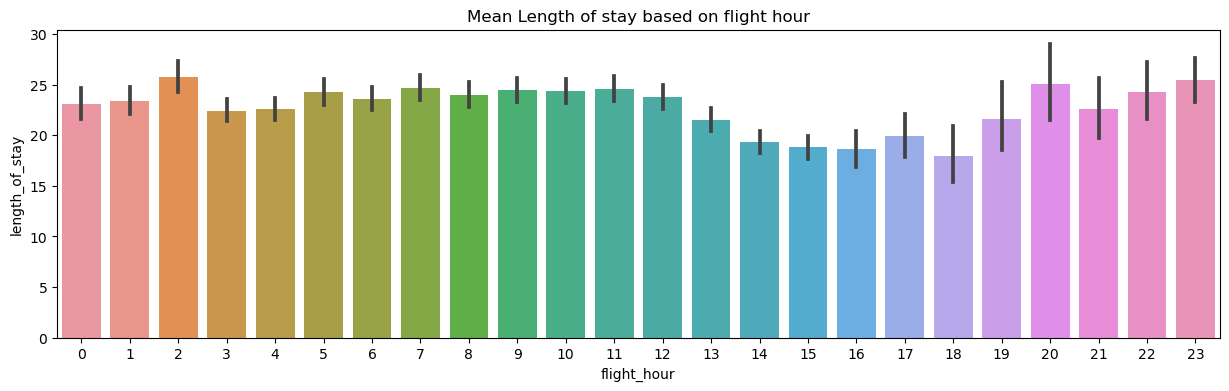

In [56]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['length_of_stay'])
plt.title('Mean Length of stay based on flight hour')
plt.show()

* Passengers traveling in flights having flight hours ranging from (13-18 hours) tend to stay for a shorter period.

# Flight Day

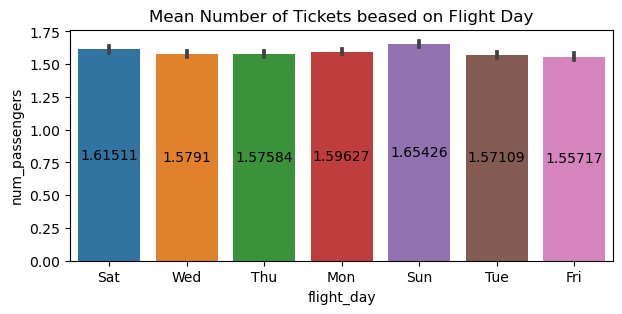

In [57]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['num_passengers'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Number of Tickets beased on Flight Day')
plt.show()

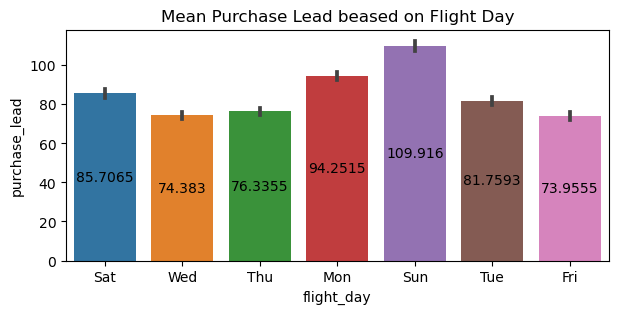

In [58]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Purchase Lead beased on Flight Day')
plt.show()

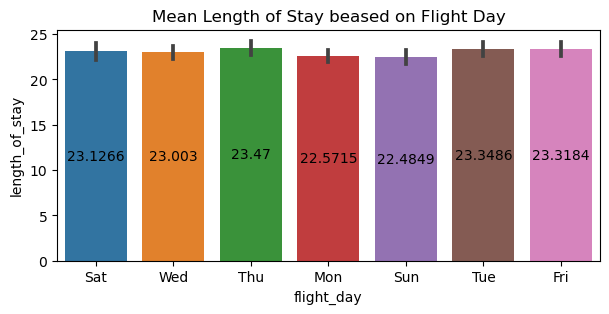

In [59]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Length of Stay beased on Flight Day')
plt.show()

# Wants Extra Baggage

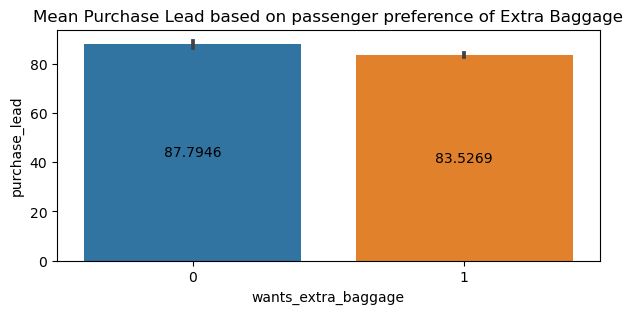

In [60]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_extra_baggage'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Purchase Lead based on passenger preference of Extra Baggage')
plt.show()

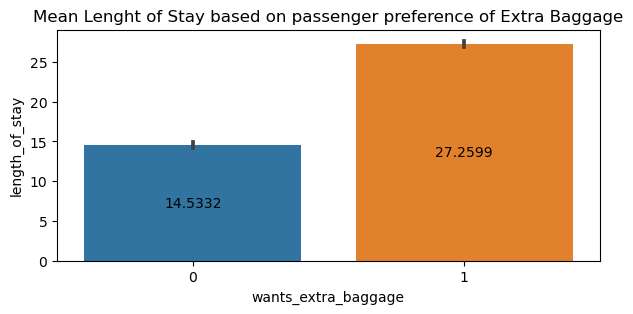

In [61]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_extra_baggage'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Lenght of Stay based on passenger preference of Extra Baggage')
plt.show()

# Wants Preferred Seats

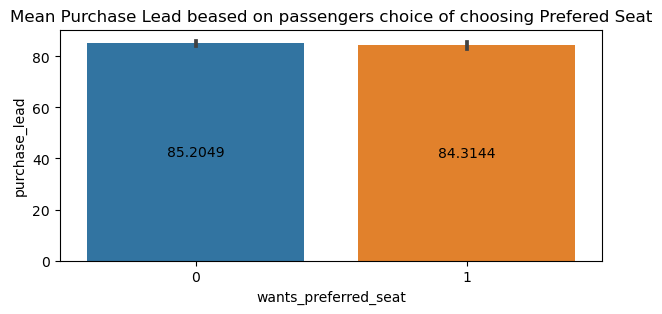

In [62]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_preferred_seat'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Purchase Lead beased on passengers choice of choosing Prefered Seat')
plt.show()

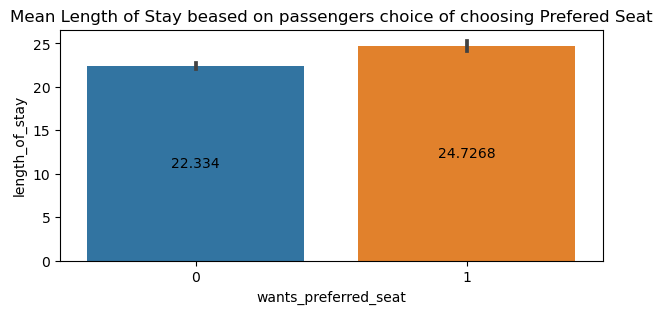

In [63]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_preferred_seat'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Length of Stay beased on passengers choice of choosing Prefered Seat')
plt.show()

# Wants In-Flight Meals

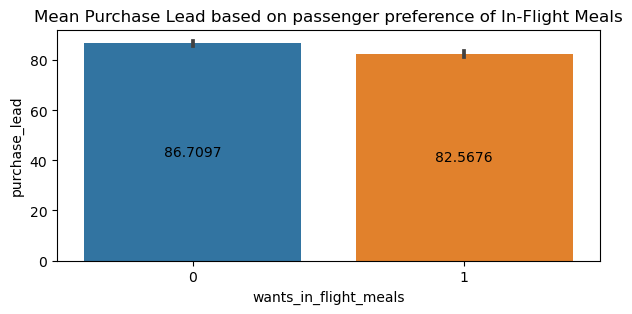

In [64]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_in_flight_meals'], y=df['purchase_lead'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Purchase Lead based on passenger preference of In-Flight Meals')
plt.show()

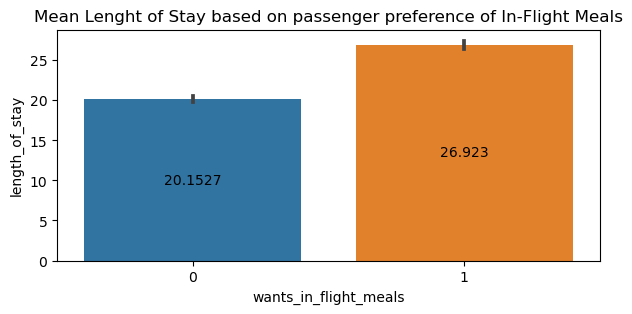

In [65]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_in_flight_meals'], y=df['length_of_stay'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Lenght of Stay based on passenger preference of In-Flight Meals')
plt.show()

# Cat vs cat

# Sales Channel

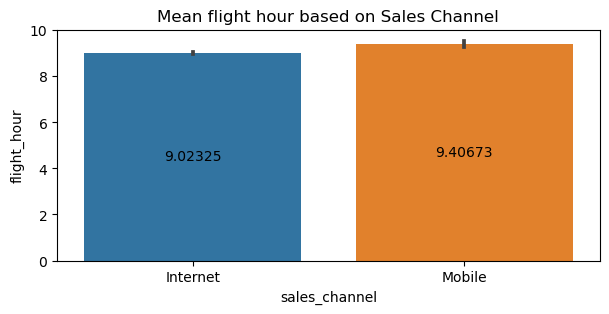

In [66]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['flight_hour'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight hour based on Sales Channel')
plt.show()

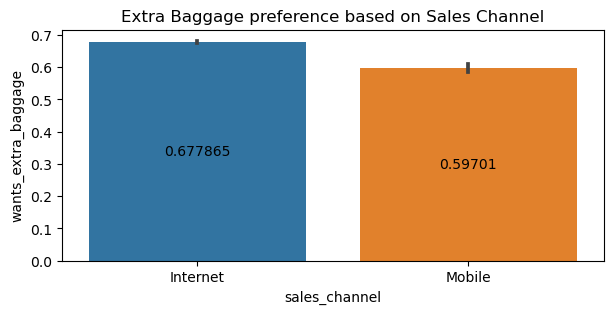

In [67]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['wants_extra_baggage'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Extra Baggage preference based on Sales Channel')
plt.show()

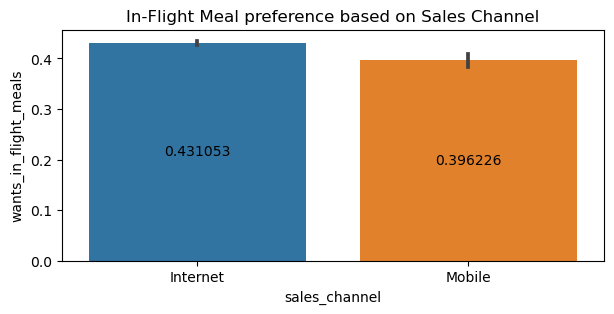

In [68]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('In-Flight Meal preference based on Sales Channel')
plt.show()

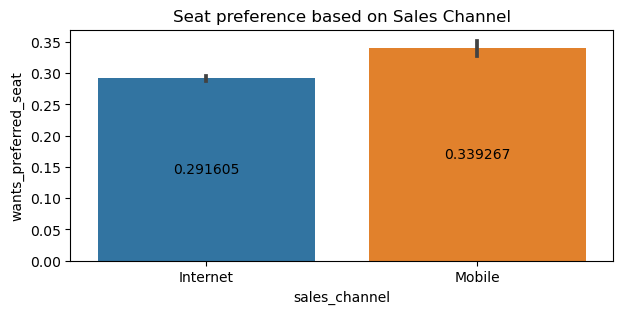

In [69]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['wants_preferred_seat'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Seat preference based on Sales Channel')
plt.show()

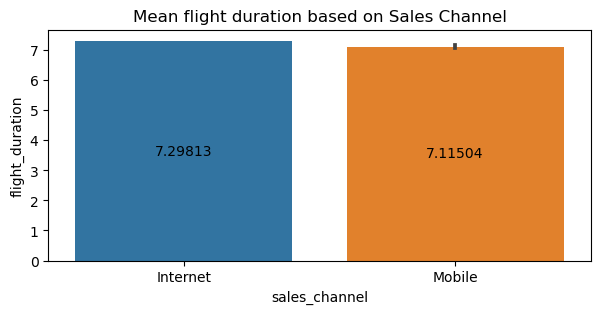

In [70]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['flight_duration'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration based on Sales Channel')
plt.show()

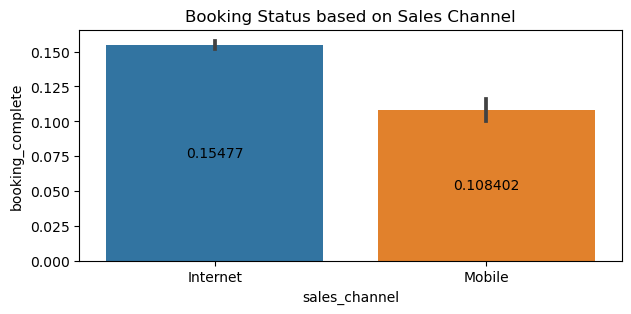

In [71]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['sales_channel'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Booking Status based on Sales Channel')
plt.show()

# Trip Type

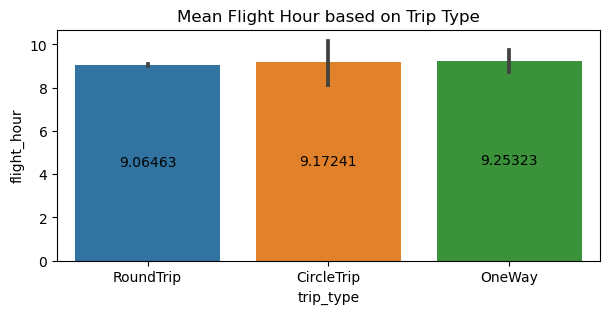

In [72]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['flight_hour'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight Hour based on Trip Type')
plt.show()

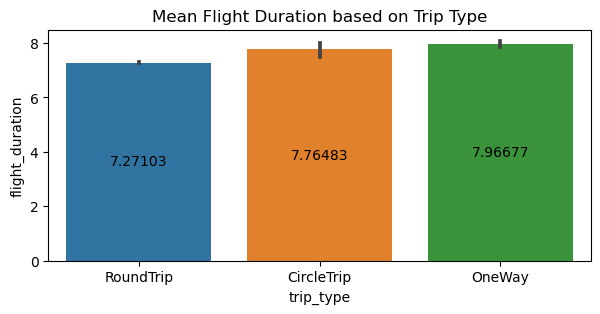

In [73]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['flight_duration'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight Duration based on Trip Type')
plt.show()

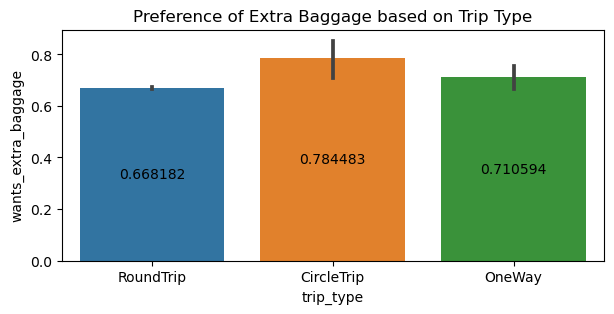

In [74]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['wants_extra_baggage'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Preference of Extra Baggage based on Trip Type')
plt.show()

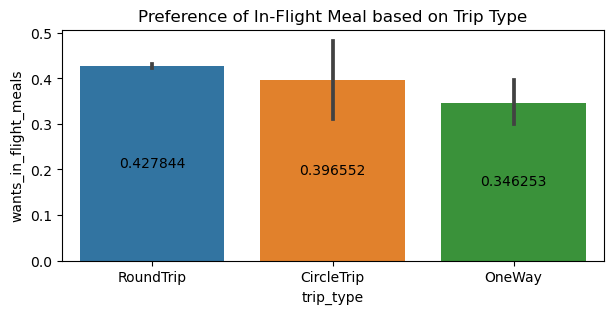

In [75]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Preference of In-Flight Meal based on Trip Type')
plt.show()

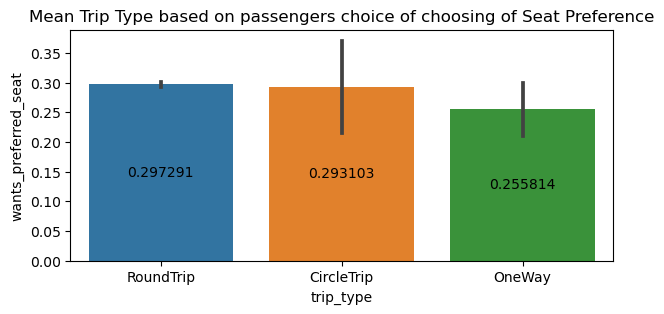

In [76]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['wants_preferred_seat'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Trip Type based on passengers choice of choosing of Seat Preference')
plt.show()

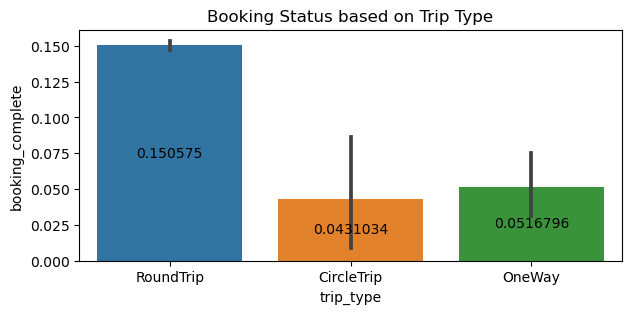

In [77]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['trip_type'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Booking Status based on Trip Type')
plt.show()

# Flight Hour

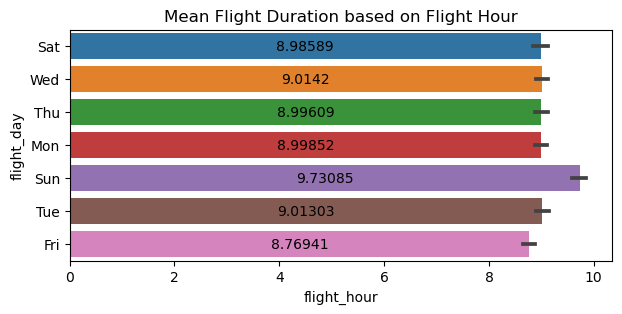

In [78]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_hour'], y=df['flight_day'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight Duration based on Flight Hour')
plt.show()

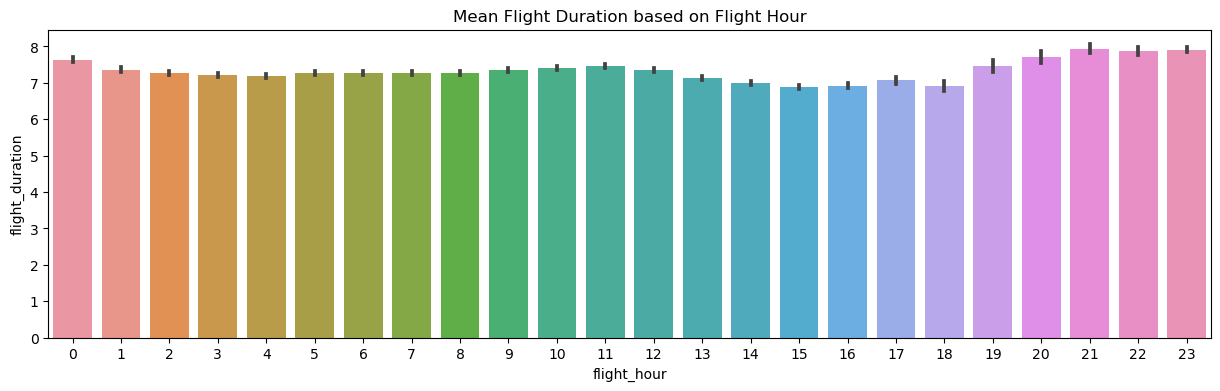

In [84]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['flight_duration'])
plt.title('Mean Flight Duration based on Flight Hour')
plt.show()

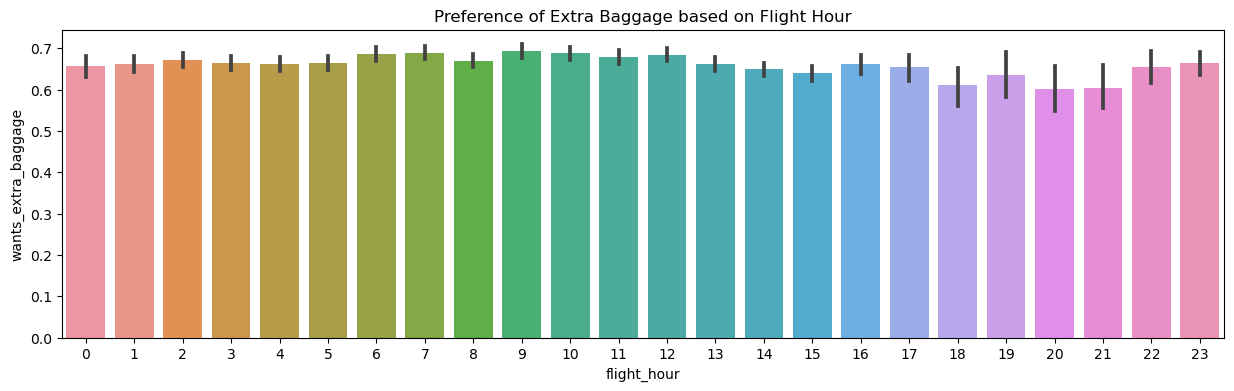

In [80]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['wants_extra_baggage'])
plt.title('Preference of Extra Baggage based on Flight Hour')
plt.show()

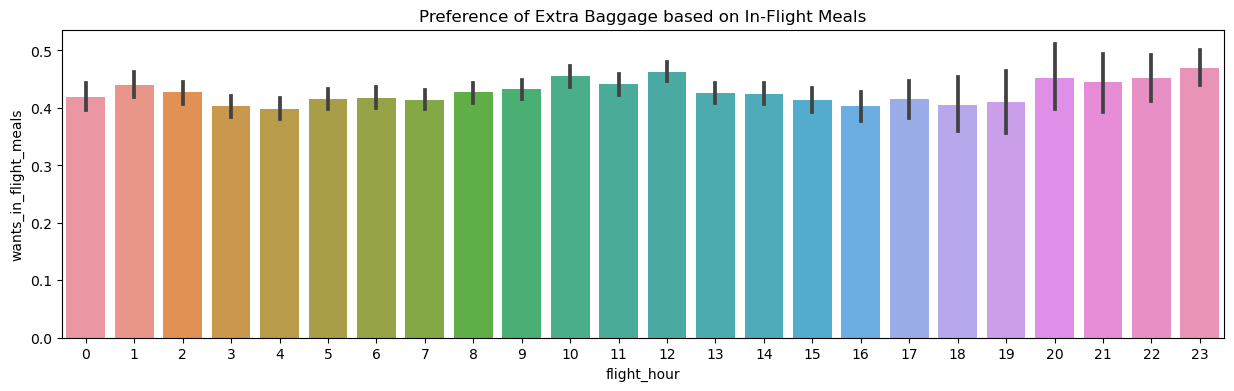

In [81]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['wants_in_flight_meals'])
plt.title('Preference of Extra Baggage based on In-Flight Meals')
plt.show()

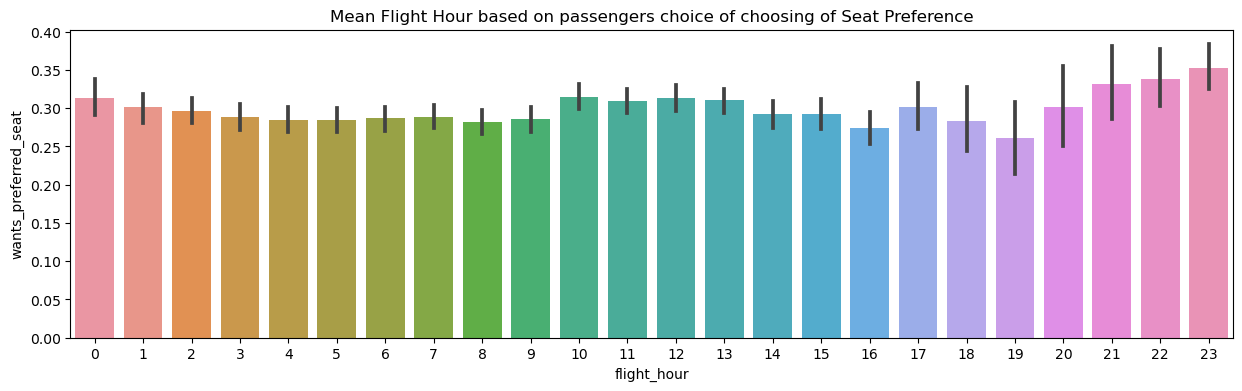

In [85]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['wants_preferred_seat'])
plt.title('Mean Flight Hour based on passengers choice of choosing of Seat Preference')
plt.show()

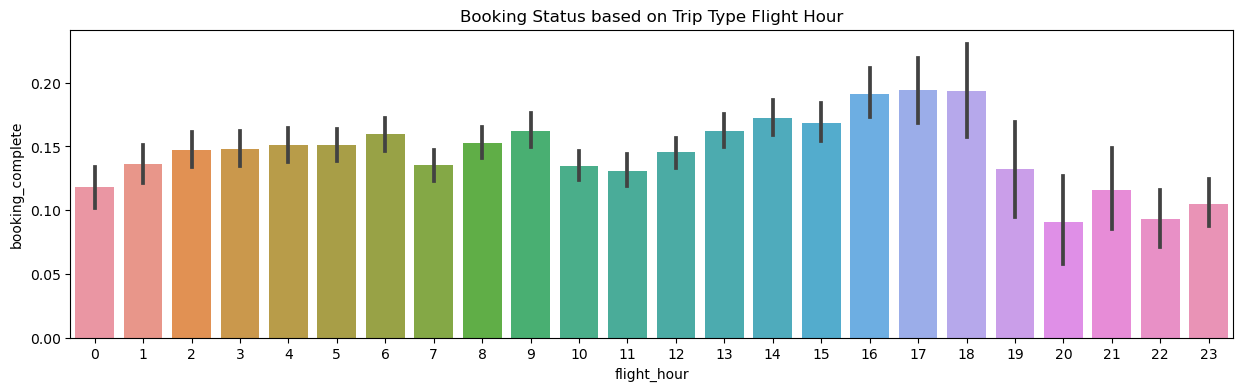

In [87]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=df['flight_hour'], y=df['booking_complete'])
plt.title('Booking Status based on Trip Type Flight Hour')
plt.show()

# Flight Day

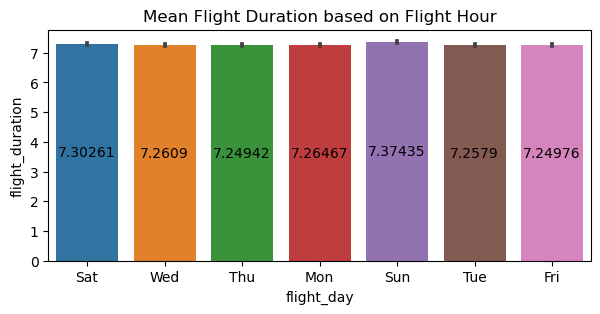

In [88]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['flight_duration'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight Duration based on Flight Hour')
plt.show()

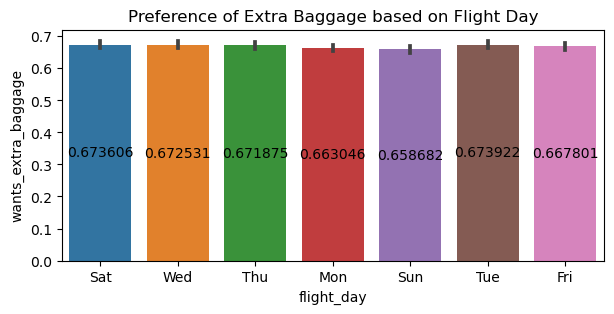

In [89]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['wants_extra_baggage'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Preference of Extra Baggage based on Flight Day')
plt.show()

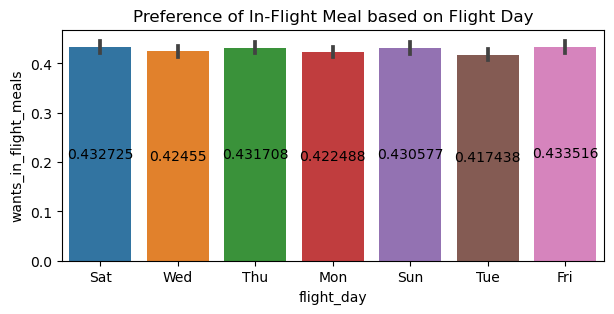

In [90]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Preference of In-Flight Meal based on Flight Day')
plt.show()

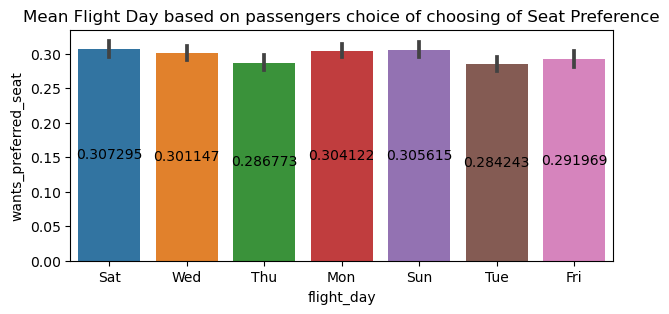

In [91]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['wants_preferred_seat'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Flight Day based on passengers choice of choosing of Seat Preference')
plt.show()

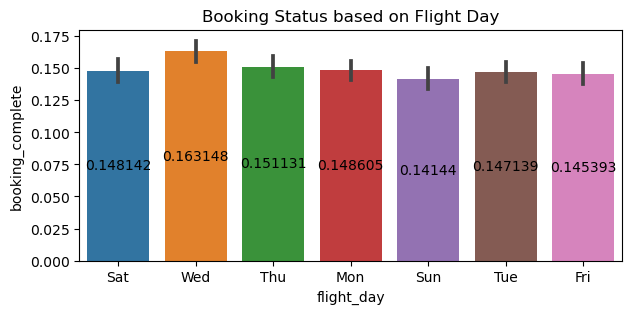

In [92]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['flight_day'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Booking Status based on Flight Day')
plt.show()

# Wants extra Baggage

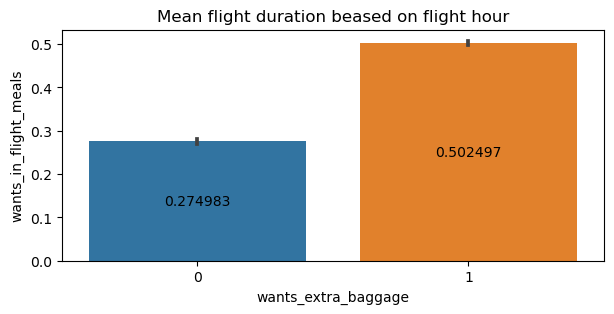

In [93]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_extra_baggage'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

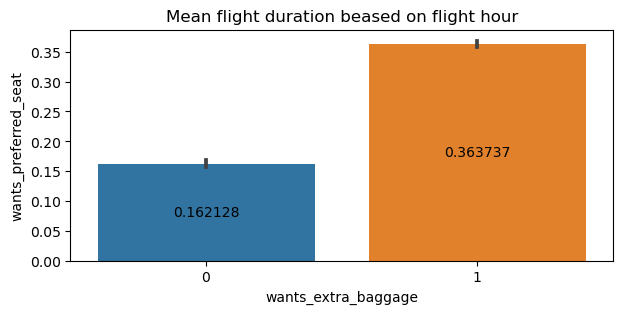

In [94]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_extra_baggage'], y=df['wants_preferred_seat'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

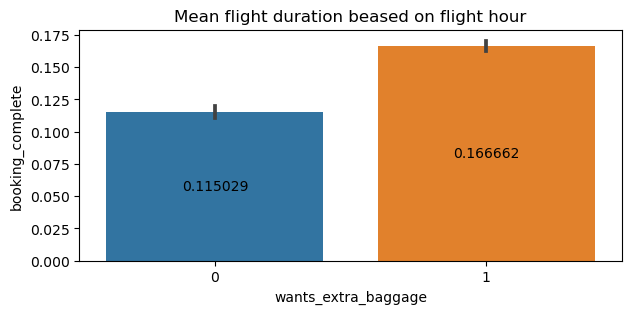

In [95]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_extra_baggage'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

# Wants prefered Seats

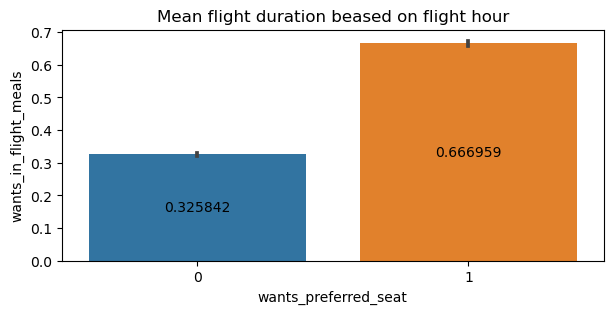

In [96]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_preferred_seat'], y=df['wants_in_flight_meals'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

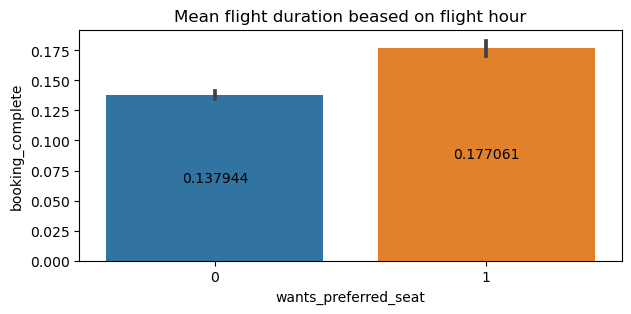

In [97]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_preferred_seat'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

# Wants In flight Meals

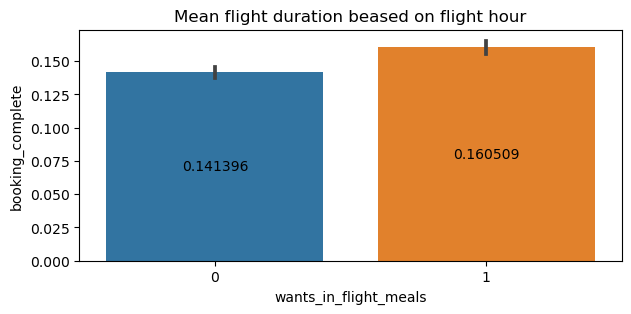

In [98]:
plt.figure(figsize=(7,3))
ax = sns.barplot(x=df['wants_in_flight_meals'], y=df['booking_complete'])
plt.bar_label(ax.containers[0], label_type='center')
plt.title('Mean flight duration beased on flight hour')
plt.show()

# Multi-Variate Analysis

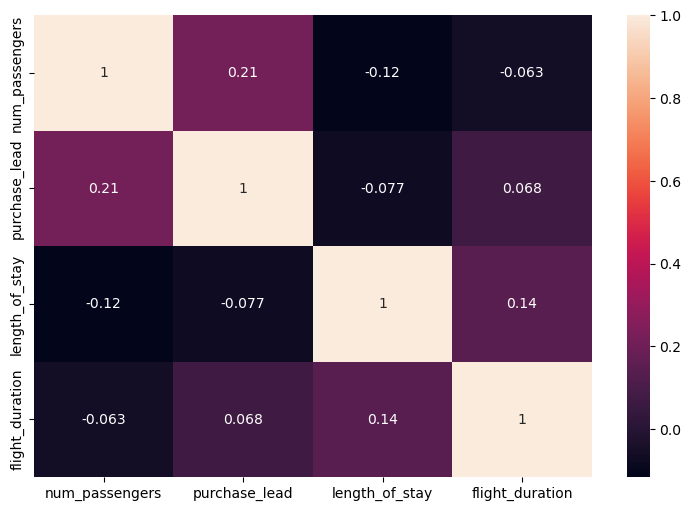

In [99]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

- We could say that people who choose prefered seats are more likely to order in flight meals and request for extra baggage capacity.
- Tried heatmaps using iqr df - Little to no change was observed

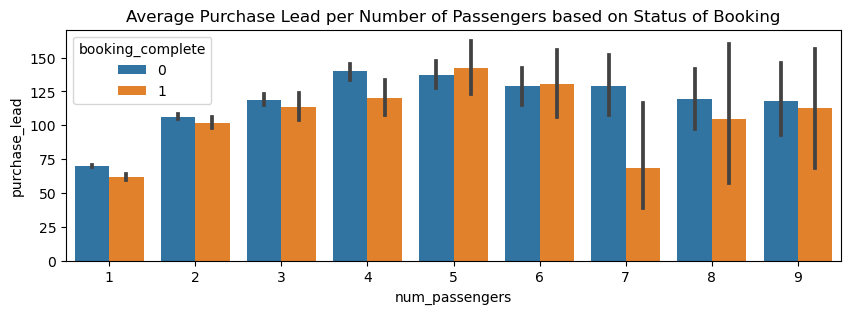

In [100]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=df['num_passengers'], y=df['purchase_lead'], hue= df['booking_complete'])
plt.title('Average Purchase Lead per Number of Passengers based on Status of Booking')
plt.show()

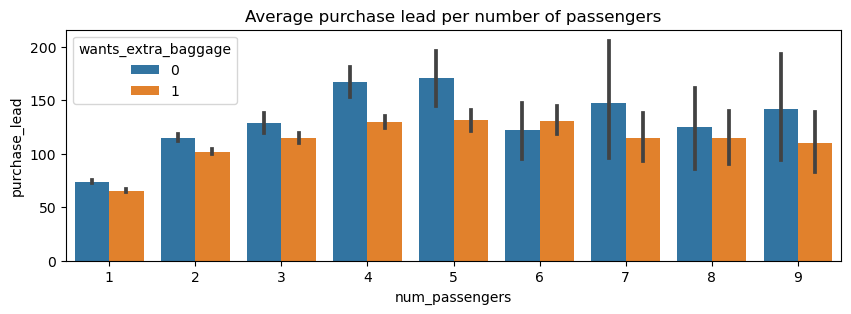

In [101]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=df['num_passengers'], y=df['purchase_lead'], hue= df['wants_extra_baggage'])
plt.title('Average purchase lead per number of passengers')
plt.show()

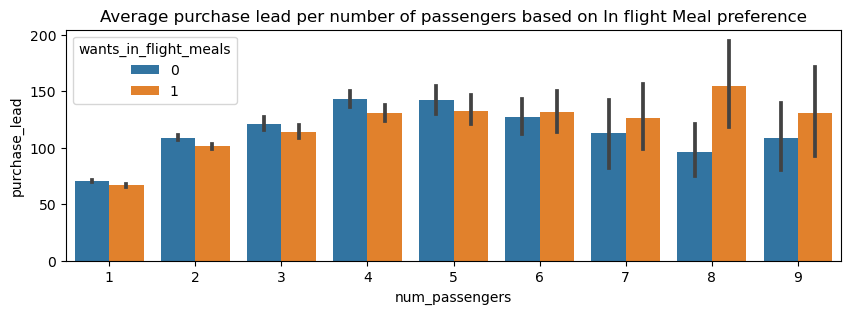

In [102]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=df['num_passengers'], y=df['purchase_lead'], hue= df['wants_in_flight_meals'])
plt.title('Average purchase lead per number of passengers based on In flight Meal preference')
plt.show()

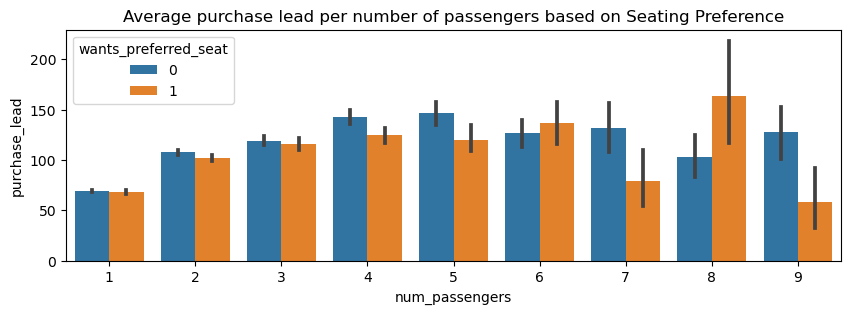

In [103]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=df['num_passengers'], y=df['purchase_lead'], hue= df['wants_preferred_seat'])
plt.title('Average purchase lead per number of passengers based on Seating Preference')
plt.show()

In [104]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
